# Multi-agent SIPP

PBS_SIPP can fail to find a solution if the graph is not well-posed. To improve success rate, try to have a larger (edge length)/(bloating radius) ratio, and also avoid having sharp corners between two edges.

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('../')

sys.path.append('../../')

from panav.util import interpolate_positions

from panav.PBS.PBS_SIPP import PBS_SIPP

from matplotlib.animation import FuncAnimation

from IPython.display import HTML, display


from panav.viz import animate_MAPF_R

%load_ext autoreload
%autoreload 2

# N agent environment

In [8]:
from itertools import product

edge_length = 2
N = 9

node_locs = np.array(np.meshgrid(np.arange(0,N),np.arange(0,N))) * edge_length

S = len(node_locs)

G = nx.DiGraph()

for row,col in product(range(N),range(N)):
    nbs = [(row-1,col),(row+1,col),
           (row,col-1),(row,col+1)]
    
    for x,y in nbs:
        if 0<=x<N and 0<=y<N:
            G.add_edges_from([((row,col),(x,y)),((x,y),(row,col))])

nx.set_node_attributes(G,(0,0),'loc')

for row,col in product(range(N),range(N)):
    G.nodes[(row,col)]['loc'] = node_locs[:,row,col]

G = nx.convert_node_labels_to_integers(G)

node_locs = {s:G.nodes[s]['loc'] for s in G}

starts = np.arange(0,N*2,2)
goals = np.arange(N*(N-1),N**2)

for i,j in product(goals,goals):
    if (i,j) in G.edges:
        G.remove_edge(i,j)

for i,j in product(starts,starts):
    if (i,j) in G.edges:
        G.remove_edge(i,j)


G.remove_nodes_from([i for i in range(N*2,N*(N-2)) if i%N!=N//2])
# G.remove_nodes_from([1,5])
# We manually add the bi-directional edges here, because
# using nx.to_directed(a undirected graph) causes issue when accessing edge values.

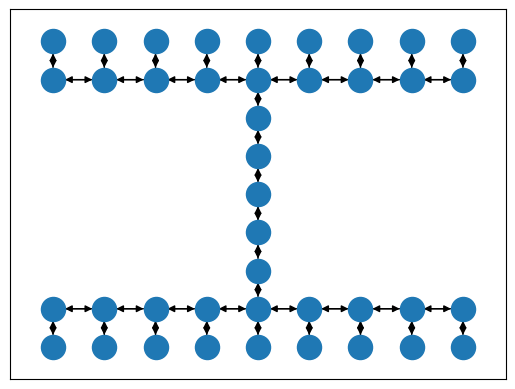

In [9]:
nx.draw_networkx(G,node_locs,with_labels=False)

In [10]:

v_max = 1.0
bloating_r = 0.2

nx.set_edge_attributes(G,
                       {e:np.linalg.norm(node_locs[e[0]]-node_locs[e[1]])/v_max\
                          for e in G.edges},
                       'weight')

In [11]:
joint_plan,ft = PBS_SIPP(G,node_locs,starts,goals,v_max,bloating_r)

PBS fail to find a feasible solution. Please make sure the agents' goals are not blocking other agents paths.


TypeError: cannot unpack non-iterable NoneType object

In [7]:
dt = 0.05

anim = animate_MAPF_R(G,node_locs,[],joint_plan,dt,bloating_r,starts,goals)
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

display(HTML(anim.to_jshtml()))
plt.close() 

NameError: name 'joint_plan' is not defined

# N agent opposing environment

In [12]:
from itertools import product
N = 5

node_locs = np.array(np.meshgrid(np.arange(0,N),np.arange(0,N)))*2

S = len(node_locs)

G = nx.DiGraph()

for row,col in product(range(N),range(N)):
    nbs = [(row-1,col),(row+1,col),
           (row,col-1),(row,col+1)]
    
    for x,y in nbs:
        if 0<=x<N and 0<=y<N:
            G.add_edges_from([((row,col),(x,y)),((x,y),(row,col))])

nx.set_node_attributes(G,(0,0),'loc')

for row,col in product(range(N),range(N)):
    G.nodes[(row,col)]['loc'] = node_locs[:,row,col]

G = nx.convert_node_labels_to_integers(G)

node_locs = {s:G.nodes[s]['loc'] for s in G}

starts = np.arange(0,N*2,2)
goals = np.arange(N*(N-1),N**2)

for i,j in product(goals,goals):
    if (i,j) in G.edges:
        G.remove_edge(i,j)

for i,j in product(starts,starts):
    if (i,j) in G.edges:
        G.remove_edge(i,j)


G.remove_nodes_from([i for i in range(N*2,N*(N-2)) if i%N!=N//2])

# G.remove_node(12)
# G.add_edges_from([(3,17),(17,3)])
# G.remove_nodes_from([1,5])
# We manually add the bi-directional edges here, because
# using nx.to_directed(a undirected graph) causes issue when accessing edge values.

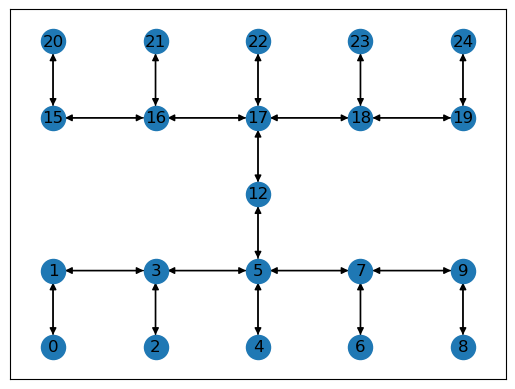

In [13]:
nx.draw_networkx(G,node_locs,with_labels=True)

In [15]:
true_starts = np.hstack([starts,goals])
true_goals = np.hstack([goals[::-1],starts[::-1]])

In [16]:

v_max = 1.0
bloating_r = 0.2

nx.set_edge_attributes(G,
                       {e:np.linalg.norm(node_locs[e[0]]-node_locs[e[1]])/v_max\
                          for e in G.edges},
                       'weight')

In [17]:
joint_plan,ft = PBS_SIPP(G,node_locs,true_starts,true_goals,v_max,bloating_r)

PBS fail to find a feasible solution. Please make sure the agents' goals are not blocking other agents paths.


TypeError: cannot unpack non-iterable NoneType object

In [18]:
dt = 0.05

anim = animate_MAPF_R(G,node_locs,[],joint_plan,dt,bloating_r,true_starts,true_goals)
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

display(HTML(anim.to_jshtml()))
plt.close() 

NameError: name 'joint_plan' is not defined